# OPTICS

In [8]:
import pandas as pd

# Carregar o dataset a partir do arquivo CSV
file_path = r'C:\Users\victor\OneDrive\Documentos\GitHub\InteligenciaArtificial_Projeto1\Dataset_EEG\EEG_data.csv'
dataset = pd.read_csv(file_path)

# Exibir as primeiras linhas do dataset para conferência
dataset.head()

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,user-definedlabeln
0,0.0,0.0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0.0,0.0
1,0.0,0.0,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0.0,0.0
2,0.0,0.0,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0.0,0.0
3,0.0,0.0,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0.0,0.0
4,0.0,0.0,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0.0,0.0


In [9]:
from sklearn.preprocessing import LabelEncoder

# Separar entrada (features) e saída (labels)
entrada = dataset.iloc[:, :-1]
saida = dataset.iloc[:, -1]

In [10]:
from sklearn.model_selection import train_test_split

# Dividir o dataset em treino e teste (70% treino, 30% teste)
entrada_treino, entrada_teste, saida_treino, saida_teste = train_test_split(entrada, saida, test_size=0.3, random_state=42)


In [14]:
from sklearn.cluster import OPTICS

# Aplicando OPTICS
optics = OPTICS(min_samples=10, xi=0.05, min_cluster_size=0.1)
solucao_optics = optics.fit_predict(entrada)

# Verificar o número de clusters encontrados (excluindo outliers)
n_clusters_optics = len(set(solucao_optics)) - (1 if -1 in solucao_optics else 0)
n_outliers_optics = list(solucao_optics).count(-1)

print(f"\nOPTICS:")
print(f" - Número de clusters: {n_clusters_optics}")
print(f" - Número de outliers: {n_outliers_optics}")



OPTICS:
 - Número de clusters: 1
 - Número de outliers: 64


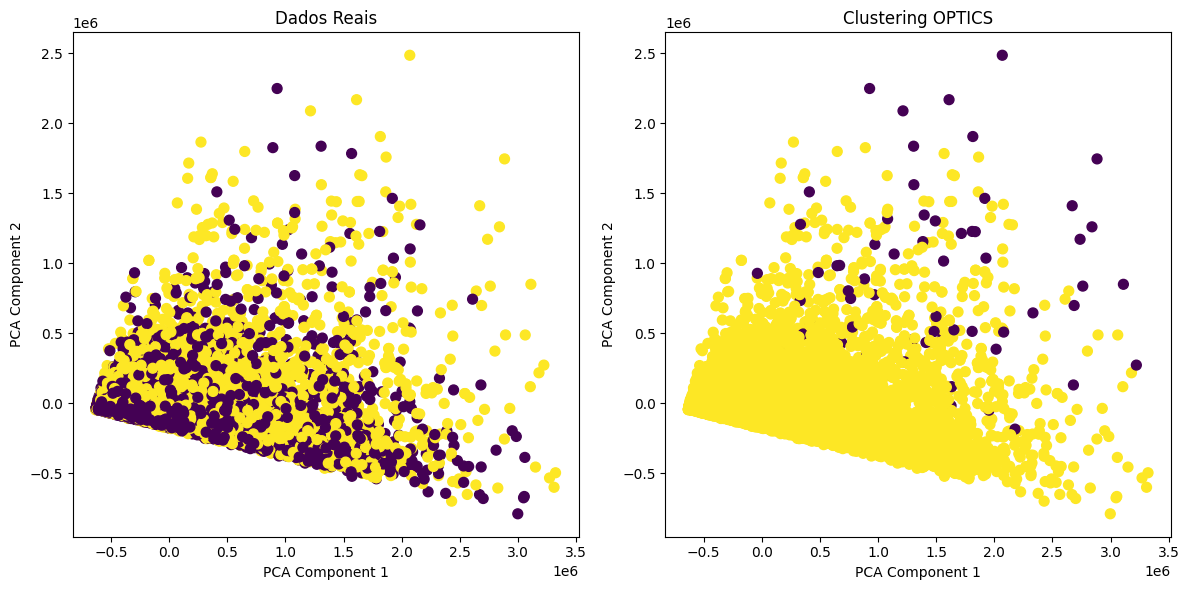

In [15]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Aplicar PCA para reduzir a dimensionalidade dos dados
pca = PCA(n_components=2)
entrada_pca = pca.fit_transform(entrada)

# Plotar gráfico para dados reais
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(entrada_pca[:, 0], entrada_pca[:, 1], c=saida, cmap='viridis', s=50)
plt.title('Dados Reais')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

# Plotar gráfico para clustering do OPTICS
plt.subplot(1, 2, 2)
plt.scatter(entrada_pca[:, 0], entrada_pca[:, 1], c=solucao_optics, cmap='viridis', s=50)
plt.title('Clustering OPTICS')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

plt.tight_layout()
plt.show()

In [ ]:
    from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
    
    silhouette_avg = silhouette_score(entrada_pca, solucao_optics)
    davies_bouldin = davies_bouldin_score(entrada_pca, solucao_optics)
    calinski_harabasz = calinski_harabasz_score(entrada_pca, solucao_optics)
    
    print(f" - Coeficiente de Silhueta: {silhouette_avg:.2f}")
    print(f" - Índice de Davies-Bouldin: {davies_bouldin:.2f}")
    print(f" - Índice de Calinski-Harabasz: {calinski_harabasz:.2f}")

 - Coeficiente de Silhueta: 0.81
 - Índice de Davies-Bouldin: 0.46
 - Índice de Calinski-Harabasz: 4082.32
